In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209MI.txt'
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209bMI.txt'
path = '../data/line_1/'
file = 'F_1_L1.I_5209MI'
fileb = 'F_1_L1.I_5209bMI'
filel = 'F_1_L1.I_5202F02_2'
def loadData(path,file_name):
    alldata = []
    for i in os.listdir('../data/line_1'):
        
        path2 = path + i + '/' + i + '_' + file_name + '.txt'
        print(path2)
        f = open(path2) 
        data = json.load(f)
        alldata.extend(data[file_name])
    return alldata

In [2]:
t = loadData(path,file)
tb = loadData(path,fileb)
l = loadData(path,filel)

../data/line_1/20180414/20180414_F_1_L1.I_5209MI.txt
../data/line_1/20180421/20180421_F_1_L1.I_5209MI.txt
../data/line_1/20180428/20180428_F_1_L1.I_5209MI.txt
../data/line_1/20180505/20180505_F_1_L1.I_5209MI.txt
../data/line_1/20180512/20180512_F_1_L1.I_5209MI.txt
../data/line_1/20180519/20180519_F_1_L1.I_5209MI.txt
../data/line_1/20180526/20180526_F_1_L1.I_5209MI.txt
../data/line_1/20180602/20180602_F_1_L1.I_5209MI.txt
../data/line_1/20180609/20180609_F_1_L1.I_5209MI.txt
../data/line_1/20180616/20180616_F_1_L1.I_5209MI.txt
../data/line_1/20180623/20180623_F_1_L1.I_5209MI.txt
../data/line_1/20180630/20180630_F_1_L1.I_5209MI.txt
../data/line_1/20180707/20180707_F_1_L1.I_5209MI.txt
../data/line_1/20180714/20180714_F_1_L1.I_5209MI.txt
../data/line_1/20180414/20180414_F_1_L1.I_5209bMI.txt
../data/line_1/20180421/20180421_F_1_L1.I_5209bMI.txt
../data/line_1/20180428/20180428_F_1_L1.I_5209bMI.txt
../data/line_1/20180505/20180505_F_1_L1.I_5209bMI.txt
../data/line_1/20180512/20180512_F_1_L1.I_

In [3]:
data_t = pd.DataFrame(t)
data_tb = pd.DataFrame(tb)
data_l = pd.DataFrame(l)

In [4]:
data_l.value = pd.to_numeric(data_l.value, errors='ignore')
data_t.value = pd.to_numeric(data_t.value,errors = 'ignore')
data_tb.value = pd.to_numeric(data_tb.value,errors = 'ignore')

data_l = data_l[data_l['value']> 0]
data_t = data_t[data_t['value'] > 0]
data_tb = data_tb[data_tb['value'] > 0] 

In [5]:
new_ts_l = [data_l['ts'].iloc[i][0:13] for i in range(0,len(data_l))]
new_ts_tb = [data_tb['ts'].iloc[i][0:13] for i in range(0,len(data_tb))]
new_ts_t = [data_t['ts'].iloc[i][0:13] for i in range(0,len(data_t))]

In [6]:
data_t.drop('ts',axis=1, inplace=True)
data_tb.drop('ts',axis = 1,inplace = True)
data_l.drop('ts',axis = 1,inplace = True)

In [7]:
data_l.insert(1,'ts',new_ts_l)
data_t.insert(1,'ts',new_ts_t)
data_tb.insert(1,'ts',new_ts_tb)

In [8]:
grouped_l = data_l['value'].groupby(data_l['ts'])
grouped_t = data_t['value'].groupby(data_t['ts'])
grouped_tb = data_tb['value'].groupby(data_tb['ts']) 

In [167]:
d1 = grouped_l.mean()
d2 = grouped_t.mean()
d3 = grouped_tb.mean()

In [168]:
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)

In [154]:
data_tb.describe()

,value
count,2.964970e+06
mean,1.332214e+02
std,2.868801e+01
min,9.480300e-02
25%,1.375439e+02
50%,1.395506e+02
75%,1.417626e+02
max,4.500000e+02


In [22]:
data_1 =  pd.merge(d1,d2,left_index= True, right_index=True)

Text(0, 0.5, 'F_1_L1.I_5209MI_mean_value')

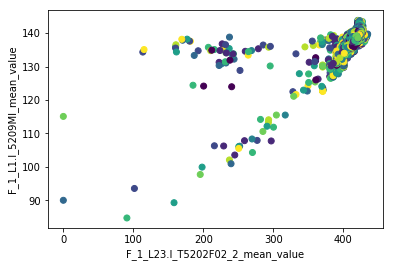

In [23]:
#电流a与流量反馈结果
import numpy as np
c=np.random.randint(0,10,len(data_1))
plt.scatter(data_1['value_x'],data_1['value_y'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2_mean_value')
plt.ylabel('F_1_L1.I_5209MI_mean_value')

In [169]:
data_2 =  pd.merge(d1,d3,left_index= True, right_index=True)

In [228]:
m = s['value_y'][s['value_y']] > 110

In [231]:
m.index

Float64Index([ 129.3475728448267, 130.08064132076953, 131.14485394067032,
               130.7719371563313, 130.41387899831716, 130.46488057890235,
              130.24457178369326, 130.58131618393745,  130.3060493425411,
               130.5152537907161,
              ...
               137.8943985325161, 137.41454663113385,  137.5513027043075,
               138.5018181781885,  138.5297848431084, 138.49314774912276,
              138.00760643885664, 138.10612630924075, 138.08486987907438,
              138.11888507322018],
             dtype='float64', name='value_y', length=400)

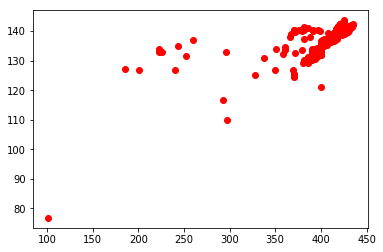

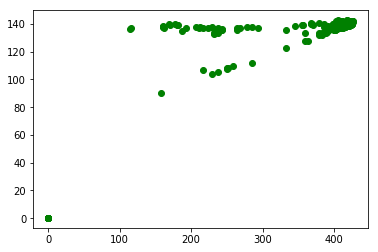

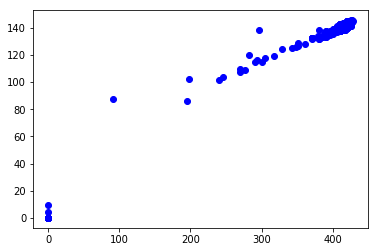

Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

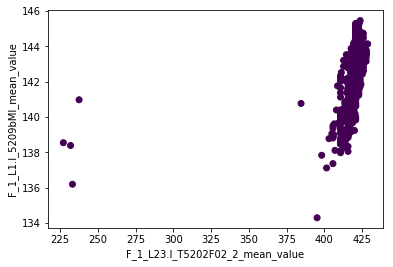

In [181]:
#电流b与流量反馈结果
import numpy as np
c=np.random.randint(0,1,len(s))
c2=np.random.randint(0,1,len(s2))
c3=np.random.randint(0,1,len(s3))
c4=np.random.randint(0,1,len(s4))
plt.scatter(s['value_x'],s['value_y'],c = 'r',marker = 'o')
plt.show()
plt.scatter(s2['value_x'],s2['value_y'],c = 'g',marker = 'o')
plt.show()
plt.scatter(s3['value_x'],s3['value_y'],c = 'b',marker = 'o')

plt.show()
plt.scatter(s4['value_x'],s4['value_y'],c = c4,marker = 'o')

plt.xlabel('F_1_L23.I_T5202F02_2_mean_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')

In [224]:
s = data_2[data_2.index < '2018-05-01 ']

In [172]:
s2 = data_2[data_2.index < '2018-06-01 ']
s2 = s2[s2.index > '2018-05-01' ]

In [173]:
s3 = data_2[data_2.index < '2018-07-01 ']
s3 = s3[s3.index > '2018-06-01' ]

In [174]:
s4 = data_2[data_2.index < '2018-08-01 ']
s4 = s4[s4.index > '2018-07-01' ]

In [73]:
data_2

,value_x,value_y
ts,,
2018-04-14 08,380.708032,129.347573
2018-04-14 09,381.223213,130.080641
2018-04-14 10,385.693365,131.144854
2018-04-14 11,385.703400,130.771937
2018-04-14 12,385.692146,130.413879
2018-04-14 13,385.694467,130.464881
2018-04-14 14,385.705709,130.244572
2018-04-14 15,385.681199,130.581316
2018-04-14 16,385.692206,130.306049


In [118]:
data_2['index'] = data_2.index

In [119]:
data_2.reset_index(level=0, inplace=True)

In [120]:
data_2.drop('index',axis=1, inplace=True)

In [121]:
def get_month(hang):
    return hang['ts'][0:-6]

In [122]:
data_2['ts'] = data_2.apply(get_month,axis = 1)

In [123]:
data_2

,ts,value_x,value_y
0,2018-04,380.708032,129.347573
1,2018-04,381.223213,130.080641
2,2018-04,385.693365,131.144854
3,2018-04,385.703400,130.771937
4,2018-04,385.692146,130.413879
5,2018-04,385.694467,130.464881
6,2018-04,385.705709,130.244572
7,2018-04,385.681199,130.581316
8,2018-04,385.692206,130.306049
9,2018-04,385.704241,130.515254


In [140]:
pd.pivot_table(data_2,columns=['ts'],values = 'value_x')

ts,2018-04,2018-05,2018-06,2018-07
value_x,398.149798,360.198961,329.20569,417.052677
